Interference = Prediction 
- If as ML engineer you go to DS manager and say I have 95 % accuracy, It will not mean until and unless you have no confidance on new unrevealed data. So testing data is requrired for that. 
- Sometime testing data is only as new generated data which will give in future. So, its trouble for ML applications that how to check and improve our efficiency of model. That's why We have validation set which helps ML 
engineer to improve performace and confidance on generated model and make leart pattern trustworthy.
- It also helpful for reduce overfitting of data, overfitting is understand by practical example that, " If I learn English only by reading Shakespere's books then most of vocab which I learnt are based on philosophy and I must have trouble to find scientific terminology. 
- So, knowing exact about give set make our training set accuracy higher but on test data performance will become shameful. That's why we use some technique to reduce such thingh.
- Now, the practical methods to reduce overfitting are :
> - Use validation set as test before check to actual test data
> - Every time during partition of training, validation and test set, use random shuffle. 
> - Use DropOut method during epoch change to train model better for every one.

In [0]:
import torch
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/train-images-idx3-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw


Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw


Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw


Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw
Processing...
Done!






Create Manual Neural- Network Model:

In [0]:
from torch import nn, optim
import torch.nn.functional as F

class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784,256)
        self.fc2 = nn.Linear(256,128)
        self.fc3 = nn.Linear(128,64)
        self.fc4 = nn.Linear(64,10)

    def forward(self,x):
        x = x.view(x.shape[0],-1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.log_softmax(self.fc4(x),dim =1 )
        return x

Our goal is to define the model performace and the known method is accuracy. But there are other methods to define better performance by precision and Recall. The amother evaluation is first 5 error rate.

In [0]:
model = Classifier()

images,labels = next(iter(trainloader))
ps = torch.exp(model(images))
print(ps.shape)

torch.Size([64, 10])


here, we need most likely class with top k probable classes, which we can get from topk methodology.

In [0]:
top_p, top_class = ps.topk(1,dim=1)
print(top_p[:5,:])
print(top_class[:5,:])
print(top_p.shape," === " , top_class.shape)

tensor([[0.1070],
        [0.1095],
        [0.1086],
        [0.1082],
        [0.1083]], grad_fn=<SliceBackward>)
tensor([[3],
        [3],
        [3],
        [3],
        [3]])
torch.Size([64, 1])  ===  torch.Size([64, 1])


In [0]:
equals = top_class == labels.view(*top_class.shape)
accuracy = torch.mean(equals.type(torch.FloatTensor))
print("Accuracy : " ,(accuracy.item()*100))

Accuracy :  14.0625


Let's put validation loop 

In [0]:
#@title Tuning Parameters { form-width: "40%" }

model = Classifier()
criterian  =  nn.NLLLoss()
learning_rate = 0.003 #@param {type:"slider", min:0.001, max:0.3, step:0.001}
optimizer = optim.Adam(model.parameters(),lr = learning_rate) # from last notebook model

epochs = 30 #@param {type:"number"}

steps = 0

train_losses , test_losses = [] , [] 
for e in range(epochs):
  running_loss = 0 
  for images,labels in trainloader:
    optimizer.zero_grad()
    log_ps = model(images)
    loss = criterian(log_ps,labels)
    loss.backward()
    optimizer.step()

    running_loss += loss.item()
  else:
    test_loss = 0
    accuracy = 0

    with torch.no_grad():
      for images ,labels in testloader:
        log_ps = model(images)
        test_loss += criterian(log_ps,labels)

        ps = torch.exp(log_ps)
        top_p,top_class = ps.topk(1,dim=1)
        equals = top_class == labels.view(*top_class.shape)
        accuracy = torch.mean(equals.type(torch.FloatTensor))
    
    train_losses.append(running_loss/len(trainloader))
    test_losses.append(test_loss/len(testloader))

    print("Epoch: {}/{}.. ".format(e+1, epochs),            # directly taken from general repo. 
              "Training Loss: {:.3f}.. ".format(running_loss/len(trainloader)),
              "Test Loss: {:.3f}.. ".format(test_loss/len(testloader)),
              "Test Accuracy: {:.3f}".format(accuracy/len(testloader)))    

Epoch: 1/30..  Training Loss: 0.511..  Test Loss: 0.448..  Test Accuracy: 0.006
Epoch: 2/30..  Training Loss: 0.392..  Test Loss: 0.418..  Test Accuracy: 0.006
Epoch: 3/30..  Training Loss: 0.356..  Test Loss: 0.428..  Test Accuracy: 0.005
Epoch: 4/30..  Training Loss: 0.331..  Test Loss: 0.421..  Test Accuracy: 0.005
Epoch: 5/30..  Training Loss: 0.315..  Test Loss: 0.380..  Test Accuracy: 0.006
Epoch: 6/30..  Training Loss: 0.303..  Test Loss: 0.377..  Test Accuracy: 0.005
Epoch: 7/30..  Training Loss: 0.290..  Test Loss: 0.395..  Test Accuracy: 0.006
Epoch: 8/30..  Training Loss: 0.283..  Test Loss: 0.371..  Test Accuracy: 0.006
Epoch: 9/30..  Training Loss: 0.272..  Test Loss: 0.398..  Test Accuracy: 0.005
Epoch: 10/30..  Training Loss: 0.266..  Test Loss: 0.378..  Test Accuracy: 0.005
Epoch: 11/30..  Training Loss: 0.258..  Test Loss: 0.364..  Test Accuracy: 0.005
Epoch: 12/30..  Training Loss: 0.253..  Test Loss: 0.372..  Test Accuracy: 0.005
Epoch: 13/30..  Training Loss: 0.245.

In [0]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

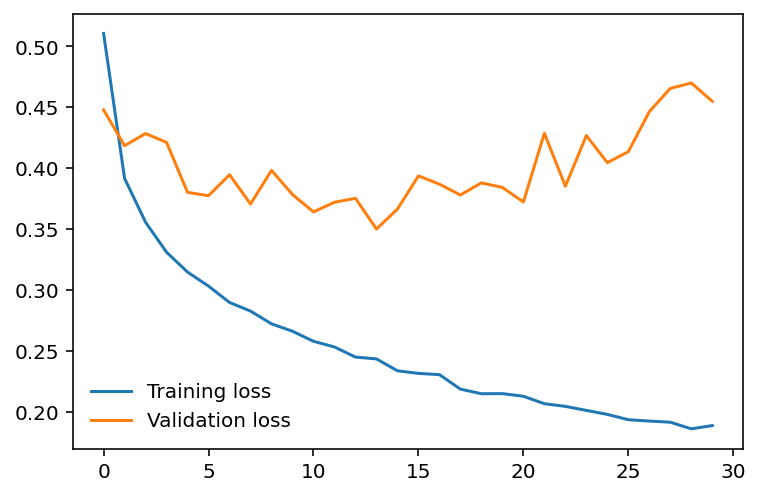

In [0]:
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Validation loss')
plt.legend(frameon=False)

From above graph we see that sometime the validation accuracy is lowest and then rise for another some period so averagely around each 8 to 10 epoch so early stopping is useful way but still it will not make our validation loss down as required.
- The main Method used for it is called [dropdown](https://www.youtube.com/watch?v=ARq74QuavAo)

In [0]:
#@title Hyper Parameter Tuning 
dropout = 0.2 #@param {type:"slider", min:0, max:0.5, step:0.1}
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)

        # Dropout module with 0.2 drop probability
        self.dropout = nn.Dropout(p=dropout)

    def forward(self, x):
        # make sure input tensor is flattened
        x = x.view(x.shape[0], -1)

        # Now with dropout
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        x = self.dropout(F.relu(self.fc3(x)))

        # output so no dropout here
        x = F.log_softmax(self.fc4(x), dim=1)

        return x

In [0]:
model_dropout = Classifier()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model_dropout.parameters(), lr=0.003)   # From previous Jupyter Notebook

epochs = 30
steps = 0

train_losses, test_losses = [], []
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        
        optimizer.zero_grad()
        
        log_ps = model_dropout(images)
        loss = criterion(log_ps, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
    else:
        test_loss = 0
        accuracy = 0
        
        # Turn off gradients for validation, saves memory and computations
        with torch.no_grad():
            model_dropout.eval()                       # For validation put model to evaluation
            for images, labels in testloader:
                log_ps = model_dropout(images)
                test_loss += criterion(log_ps, labels)
                
                ps = torch.exp(log_ps)
                top_p, top_class = ps.topk(1, dim=1)
                equals = top_class == labels.view(*top_class.shape)
                accuracy += torch.mean(equals.type(torch.FloatTensor))
        
        model_dropout.train() # Again change model to train mode to update in main traning.
        
        train_losses.append(running_loss/len(trainloader))
        test_losses.append(test_loss/len(testloader))

        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(train_losses[-1]),
              "Test Loss: {:.3f}.. ".format(test_losses[-1]),
              "Test Accuracy: {:.3f}".format(accuracy/len(testloader)))

Epoch: 1/30..  Training Loss: 0.605..  Test Loss: 0.489..  Test Accuracy: 0.817
Epoch: 2/30..  Training Loss: 0.490..  Test Loss: 0.429..  Test Accuracy: 0.846
Epoch: 3/30..  Training Loss: 0.458..  Test Loss: 0.421..  Test Accuracy: 0.846
Epoch: 4/30..  Training Loss: 0.434..  Test Loss: 0.409..  Test Accuracy: 0.850
Epoch: 5/30..  Training Loss: 0.424..  Test Loss: 0.397..  Test Accuracy: 0.861
Epoch: 6/30..  Training Loss: 0.419..  Test Loss: 0.400..  Test Accuracy: 0.857
Epoch: 7/30..  Training Loss: 0.408..  Test Loss: 0.390..  Test Accuracy: 0.862
Epoch: 8/30..  Training Loss: 0.402..  Test Loss: 0.394..  Test Accuracy: 0.856
Epoch: 9/30..  Training Loss: 0.388..  Test Loss: 0.393..  Test Accuracy: 0.860
Epoch: 10/30..  Training Loss: 0.396..  Test Loss: 0.383..  Test Accuracy: 0.863
Epoch: 11/30..  Training Loss: 0.384..  Test Loss: 0.417..  Test Accuracy: 0.853
Epoch: 12/30..  Training Loss: 0.377..  Test Loss: 0.387..  Test Accuracy: 0.864
Epoch: 13/30..  Training Loss: 0.387.

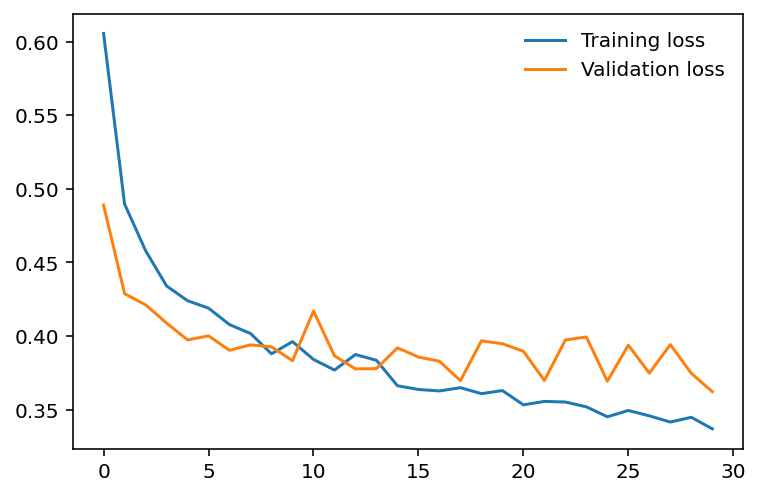

In [0]:
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Validation loss')
plt.legend(frameon=False)

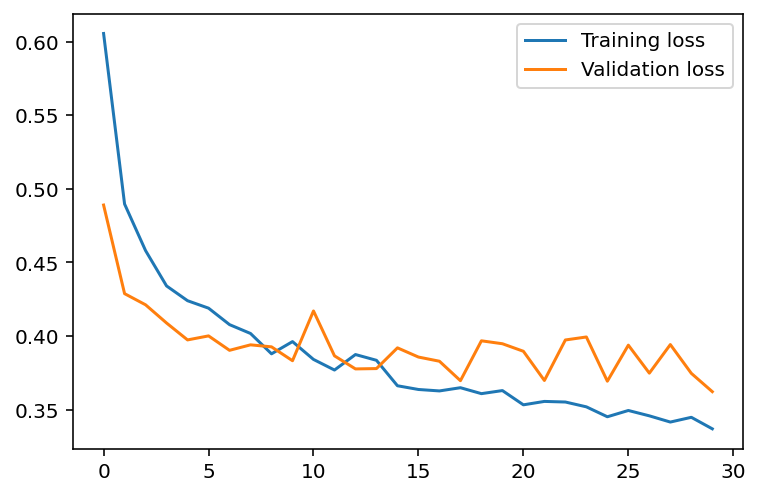

In [0]:
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Validation loss')
plt.legend(frameon=True)

Prediction(Interfernce)

In [0]:
#@title view_classify ploting function (just run it) { run: "auto", display-mode: "form" }
import matplotlib.pyplot as plt
import numpy as np

def view_classify(img, ps, version="MNIST"):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    elif version == "Fashion":
        ax2.set_yticklabels(['T-shirt/top',
                            'Trouser',
                            'Pullover',
                            'Dress',
                            'Coat',
                            'Sandal',
                            'Shirt',
                            'Sneaker',
                            'Bag',
                            'Ankle Boot'], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

plt.tight_layout()


<Figure size 432x288 with 0 Axes>

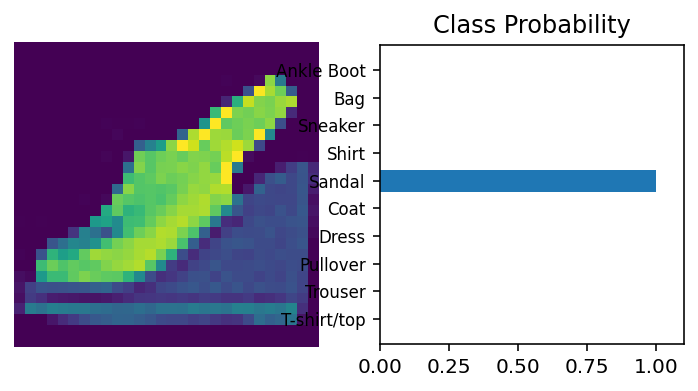

In [0]:
model_dropout.eval()

images,labels = next(iter(testloader))
image = images[0]

# To view image 
img = image.view(1,784)

# prediction
with torch.no_grad():
  ps = torch.exp(model_dropout(image))



view_classify(img.view(1,28,28),ps, version="Fashion")

 As you can imagine, it's impractical to train a network every time you need to use it. Instead, we can save trained networks then load them later to train more or use them for predictions.

The parameters for PyTorch networks are stored in a model's `state_dict`. We can see the state dict contains the weight and bias matrices for each of our layers.

In [0]:
print("Our model: \n\n", model_dropout, '\n')
print("The state dict keys: \n\n", model_dropout.state_dict().keys())

Our model: 

 Classifier(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
) 

The state dict keys: 

 odict_keys(['fc1.weight', 'fc1.bias', 'fc2.weight', 'fc2.bias', 'fc3.weight', 'fc3.bias', 'fc4.weight', 'fc4.bias'])


In [0]:
# save the model stae
torch.save(model_dropout.state_dict(),"pred_model.pth") 

In [0]:
# Now load model for use 
state_dict = torch.load("pred_model.pth")
print(state_dict.keys())

odict_keys(['fc1.weight', 'fc1.bias', 'fc2.weight', 'fc2.bias', 'fc3.weight', 'fc3.bias', 'fc4.weight', 'fc4.bias'])


In [0]:
model_dropout.load_state_dict(state_dict) 

In [0]:
# Keep Learining, Enjoy Empowering